In [78]:
import pandas as pd
import itertools as iter
import re
import numpy as np
import socket
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer
import seaborn
rowskip = 1
no_of_rows = 1000
items = 60
support_percent = 10/100
confidence = 0 
minimum_support = support_percent * no_of_rows
plt.figure(num=None, figsize=(20, 8), dpi=200, facecolor='w', edgecolor='k')
# final_three_itemset = pd.DataFrame();
# final_two_itemset = pd.DataFrame();
# final_one_itemset = pd.DataFrame();
print("Minimum support = "+str(minimum_support))

Minimum support = 100.0


In [2]:
def sendToServer(send_bytes):
    host = '127.0.0.1'
    #host = '169.254.0.153'
    port = 53
    s = socket.socket()
    s.connect((host,port))
    print("Connected Server")
    s.send(send_bytes)
    received_bytes = s.recv(500000)
    return received_bytes

In [3]:
def get_combinations(dataframe,dim):   
    colComb = [a for a in iter.combinations(dataframe.columns,dim)]
    return colComb

def get_combinations_from_list(lst,start,end):
    comb = (iter.combinations(lst, l) for l in range(start,end))
    return list(iter.chain.from_iterable(comb))

In [24]:
def add_to_final_itemset(final_set,frequent_itemset):
    if final_set.empty:
        final_set = frequent_itemset
    else:
        final_set = final_set.add(frequent_itemset,fill_value=0)
    return final_set

In [25]:
transactions = pd.read_csv("original1.csv",skiprows = range (1,rowskip),nrows = no_of_rows)
transactions

,shoes,socks,cheese,bread,pizza_base,rice,wheat,pickle,jam,colgate,...,det_soap,clg_plax,handwash,pears,hairoil,shampoo,pohe,rava,ghee,KK_oil
0,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
6,1,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
8,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1,1


In [26]:
one_item_count = transactions.sum(axis=0)
print("One Item Count:\n\n"+str(one_item_count))

One Item Count:

shoes              298
socks              298
cheese             272
bread              300
pizza_base         172
rice               472
wheat              500
pickle             212
jam                142
colgate            186
brush              186
surf_excel          56
rin                170
freshner           100
harpic             100
comfort _fabric    228
oreo               170
parle_g            156
choco_pie          170
pants              188
slim_shirt         244
shirt              102
mug                132
tray               118
nescafe             86
tea                 72
curtains           144
bedsheets          144
tiffin             128
bottle             128
det_soap           200
clg_plax           198
handwash           184
pears              142
hairoil            128
shampoo            142
pohe               156
rava               172
ghee               142
KK_oil             272
dtype: int64


In [27]:
frequent_one_item_count = one_item_count[one_item_count >= minimum_support]
print("Frequent One Item Count:\n\n"+str(frequent_one_item_count))

Frequent One Item Count:

shoes              298
socks              298
cheese             272
bread              300
pizza_base         172
rice               472
wheat              500
pickle             212
jam                142
colgate            186
brush              186
rin                170
freshner           100
harpic             100
comfort _fabric    228
oreo               170
parle_g            156
choco_pie          170
pants              188
slim_shirt         244
shirt              102
mug                132
tray               118
curtains           144
bedsheets          144
tiffin             128
bottle             128
det_soap           200
clg_plax           198
handwash           184
pears              142
hairoil            128
shampoo            142
pohe               156
rava               172
ghee               142
KK_oil             272
dtype: int64


In [28]:
global_frequent_one_itemset = pickle.loads(sendToServer(pickle.dumps(frequent_one_item_count)))
final_one_itemset = add_to_final_itemset(final_one_itemset,global_frequent_one_itemset)
print("Global Frequent One Item Count:\n\n"+str(global_frequent_one_itemset))

Connected Server
Global Frequent One Item Count:

shoes              298.0
socks              298.0
cheese             272.0
bread              300.0
pizza_base         172.0
rice               472.0
wheat              500.0
pickle             212.0
colgate            186.0
brush              186.0
rin                170.0
comfort _fabric    228.0
oreo               170.0
choco_pie          170.0
pants              188.0
slim_shirt         244.0
det_soap           200.0
clg_plax           198.0
handwash           184.0
rava               172.0
KK_oil             272.0
dtype: float64


In [29]:
two_item_count = pd.Series()
combinations = get_combinations(transactions,2)
#print(combinations)
for column_index in combinations: 
    columns = str(column_index).strip("(,')").split()
    column1 = columns[0].strip("',")
    column2 = columns[1].strip("',")
    if(column1 in global_frequent_one_itemset.index and column2 in global_frequent_one_itemset.index):
        temp = pd.Series([(transactions[column1] & transactions[column2]).sum()],index = [column1+","+column2])
        
        two_item_count = two_item_count.append(temp)
    
print("\n\nTwo Item Count:\n\n"+str(two_item_count))



Two Item Count:

shoes,socks             298
shoes,cheese             42
shoes,bread              42
shoes,pizza_base         56
shoes,rice              172
shoes,wheat             172
shoes,pickle             56
shoes,colgate            30
shoes,brush              30
shoes,choco_pie          14
shoes,pants             156
shoes,slim_shirt        198
shoes,det_soap           42
shoes,clg_plax            0
shoes,rava               56
shoes,KK_oil             72
socks,cheese             42
socks,bread              42
socks,pizza_base         56
socks,rice              172
socks,wheat             172
socks,pickle             56
socks,colgate            30
socks,brush              30
socks,choco_pie          14
socks,pants             156
socks,slim_shirt        198
socks,det_soap           42
socks,clg_plax            0
socks,rava               56
                       ... 
colgate,rava             58
colgate,KK_oil           30
brush,choco_pie           0
brush,pants               0
b

In [30]:
frequent_two_item_count = two_item_count[two_item_count>=minimum_support]
print("\n\nFrequent Two Item Count:\n\n"+str(frequent_two_item_count))



Frequent Two Item Count:

shoes,socks          298
shoes,rice           172
shoes,wheat          172
shoes,pants          156
shoes,slim_shirt     198
socks,rice           172
socks,wheat          172
socks,pants          156
socks,slim_shirt     198
cheese,bread         228
cheese,pizza_base    102
bread,pizza_base     114
bread,choco_pie      100
rice,wheat           472
rice,pickle          128
rice,pants           118
rice,slim_shirt      146
rice,KK_oil          114
wheat,pickle         156
wheat,pants          118
wheat,slim_shirt     146
wheat,KK_oil         128
colgate,brush        186
colgate,clg_plax     142
brush,clg_plax       142
pants,slim_shirt     188
dtype: int64


In [31]:
global_frequent_two_itemset = pickle.loads(sendToServer(pickle.dumps(frequent_two_item_count)))

Connected Server


In [32]:
#print("\n\nGlobal Two Item Count:\n\n"+str(global_frequent_two_itemset))
final_two_itemset = add_to_final_itemset(final_two_itemset,global_frequent_two_itemset)
print("\n\nFinal Two Item Count:\n\n"+str(final_two_itemset))



Final Two Item Count:

cheese,bread         457.0
colgate,brush        375.0
pants,slim_shirt     378.0
parle_g,choco_pie    160.0
rice,wheat           944.0
shoes,rice           346.0
shoes,slim_shirt     399.0
shoes,socks          599.0
shoes,wheat          346.0
socks,rice           346.0
socks,slim_shirt     399.0
socks,wheat          346.0
dtype: float64


In [33]:
three_item_count = pd.Series()
combinations = get_combinations(transactions,3)
for column_index in combinations: 
    columns = str(column_index).strip("(,')").split()
    column1 = columns[0].strip("',")
    column2 = columns[1].strip("',")
    column3 = columns[2].strip("',")

    if((column1+","+column2) in global_frequent_two_itemset.index and (column1+","+column3) in global_frequent_two_itemset.index and (column2+","+column3) in global_frequent_two_itemset.index):
        temp = pd.Series([(transactions[column1] & transactions[column2] & (transactions[column3])).sum()],index = [column1+","+column2+","+column3])
        
        three_item_count = three_item_count.append(temp)
    
print("\n\nThree Item Count:\n\n"+str(three_item_count))



Three Item Count:

shoes,socks,rice          172
shoes,socks,wheat         172
shoes,socks,slim_shirt    198
shoes,rice,wheat          172
socks,rice,wheat          172
dtype: int64


In [34]:
frequent_three_item_count = three_item_count[three_item_count>=minimum_support]
print("\n\nFrequent Three Item Count:\n\n"+str(frequent_three_item_count))



Frequent Three Item Count:

shoes,socks,rice          172
shoes,socks,wheat         172
shoes,socks,slim_shirt    198
shoes,rice,wheat          172
socks,rice,wheat          172
dtype: int64


In [35]:
global_frequent_three_itemset = pickle.loads(sendToServer(pickle.dumps(frequent_three_item_count)))

Connected Server


In [36]:
print("\n\nGlobal Frequent Three Item Count:\n\n"+str(global_frequent_three_itemset ))



Global Frequent Three Item Count:

shoes,socks,rice          172.0
shoes,socks,wheat         172.0
shoes,socks,slim_shirt    198.0
shoes,rice,wheat          172.0
socks,rice,wheat          172.0
dtype: float64


In [37]:
final_three_itemset = add_to_final_itemset(final_three_itemset,global_frequent_three_itemset)
rowskip += no_of_rows
print("\n\nPrevious Final Itemset:\n\n"+str(final_three_itemset))



Previous Final Itemset:

shoes,socks,rice          346.0
shoes,socks,wheat         346.0
shoes,socks,slim_shirt    399.0
shoes,rice,wheat          346.0
socks,rice,wheat          346.0
dtype: float64


In [38]:
final_minimum_support = support_percent * rowskip

In [39]:
print (rowskip)
print (final_two_itemset)

2001
cheese,bread         457.0
colgate,brush        375.0
pants,slim_shirt     378.0
parle_g,choco_pie    160.0
rice,wheat           944.0
shoes,rice           346.0
shoes,slim_shirt     399.0
shoes,socks          599.0
shoes,wheat          346.0
socks,rice           346.0
socks,slim_shirt     399.0
socks,wheat          346.0
dtype: float64


In [40]:
final_two_items = pd.Series()
final_two_items = final_two_items.append(final_two_itemset)
for index1 in final_two_itemset.index:
    columns = str(index1).split(",")
    column1 = columns[0]
    column2 = columns[1]
    for index2 in final_three_itemset.index:
        if column1 in index2 and column2 in index2:
            #print(index1)
            final_two_itemset = final_two_itemset.drop(index1)
            break

print(final_two_itemset)

In [41]:
print(final_three_itemset)

In [ ]:
association_rules = pd.Series()
association_list = []

for inx in final_three_itemset.index:
    association_list = []
    columns = str(inx).split(",")
    column1 = columns[0]
    column2 = columns[1]
    column3 = columns[2]
    
    combinations = get_combinations_from_list([column1,column2,column3],1,4)
    column1 = ""
    column2 = ""
    column3 = ""
    for item in combinations:
        
        columns = str(item).strip("(,')").split()
        
        if (len(columns) == 1):
            column1 = columns[0].strip("',")
            if column1 not in association_list:
                confidence = (final_three_itemset[inx]/final_one_itemset[column1]) * 100 ;
                #print(confidence)
                if confidence > 80 :
                    association_list.append(column1)
                    association_rules  = association_rules.append(pd.Series(inx.replace(column1,''), index=[""+column1]))
                
     

In [75]:
for inx in final_three_itemset.index:
    association_list = []
    columns = str(inx).split(",")
    column1 = columns[0]
    column2 = columns[1]
    column3 = columns[2]
    
    combinations = get_combinations_from_list([column1,column2,column3],1,4)
    column1 = ""
    column2 = ""
    column3 = ""
    for item in combinations:
        
        columns = str(item).strip("(,')").split()
        

        if (len(columns) == 2):
            column1 = columns[0].strip("',")
            column2 = columns[1].strip("',")
            
            if column1 not in association_list and column2 not in association_list :
                confidence = (final_three_itemset[inx]/final_two_items[column1+","+column2]) * 100 ;
                #print(confidence)
                if confidence > 80 :
                    association_rules = association_rules.append(pd.Series(inx.replace(column1,'').replace(column2,''), index=[""+column1+","+column2]))

NameError: name 'final_two_items' is not defined

In [43]:
print(association_rules)

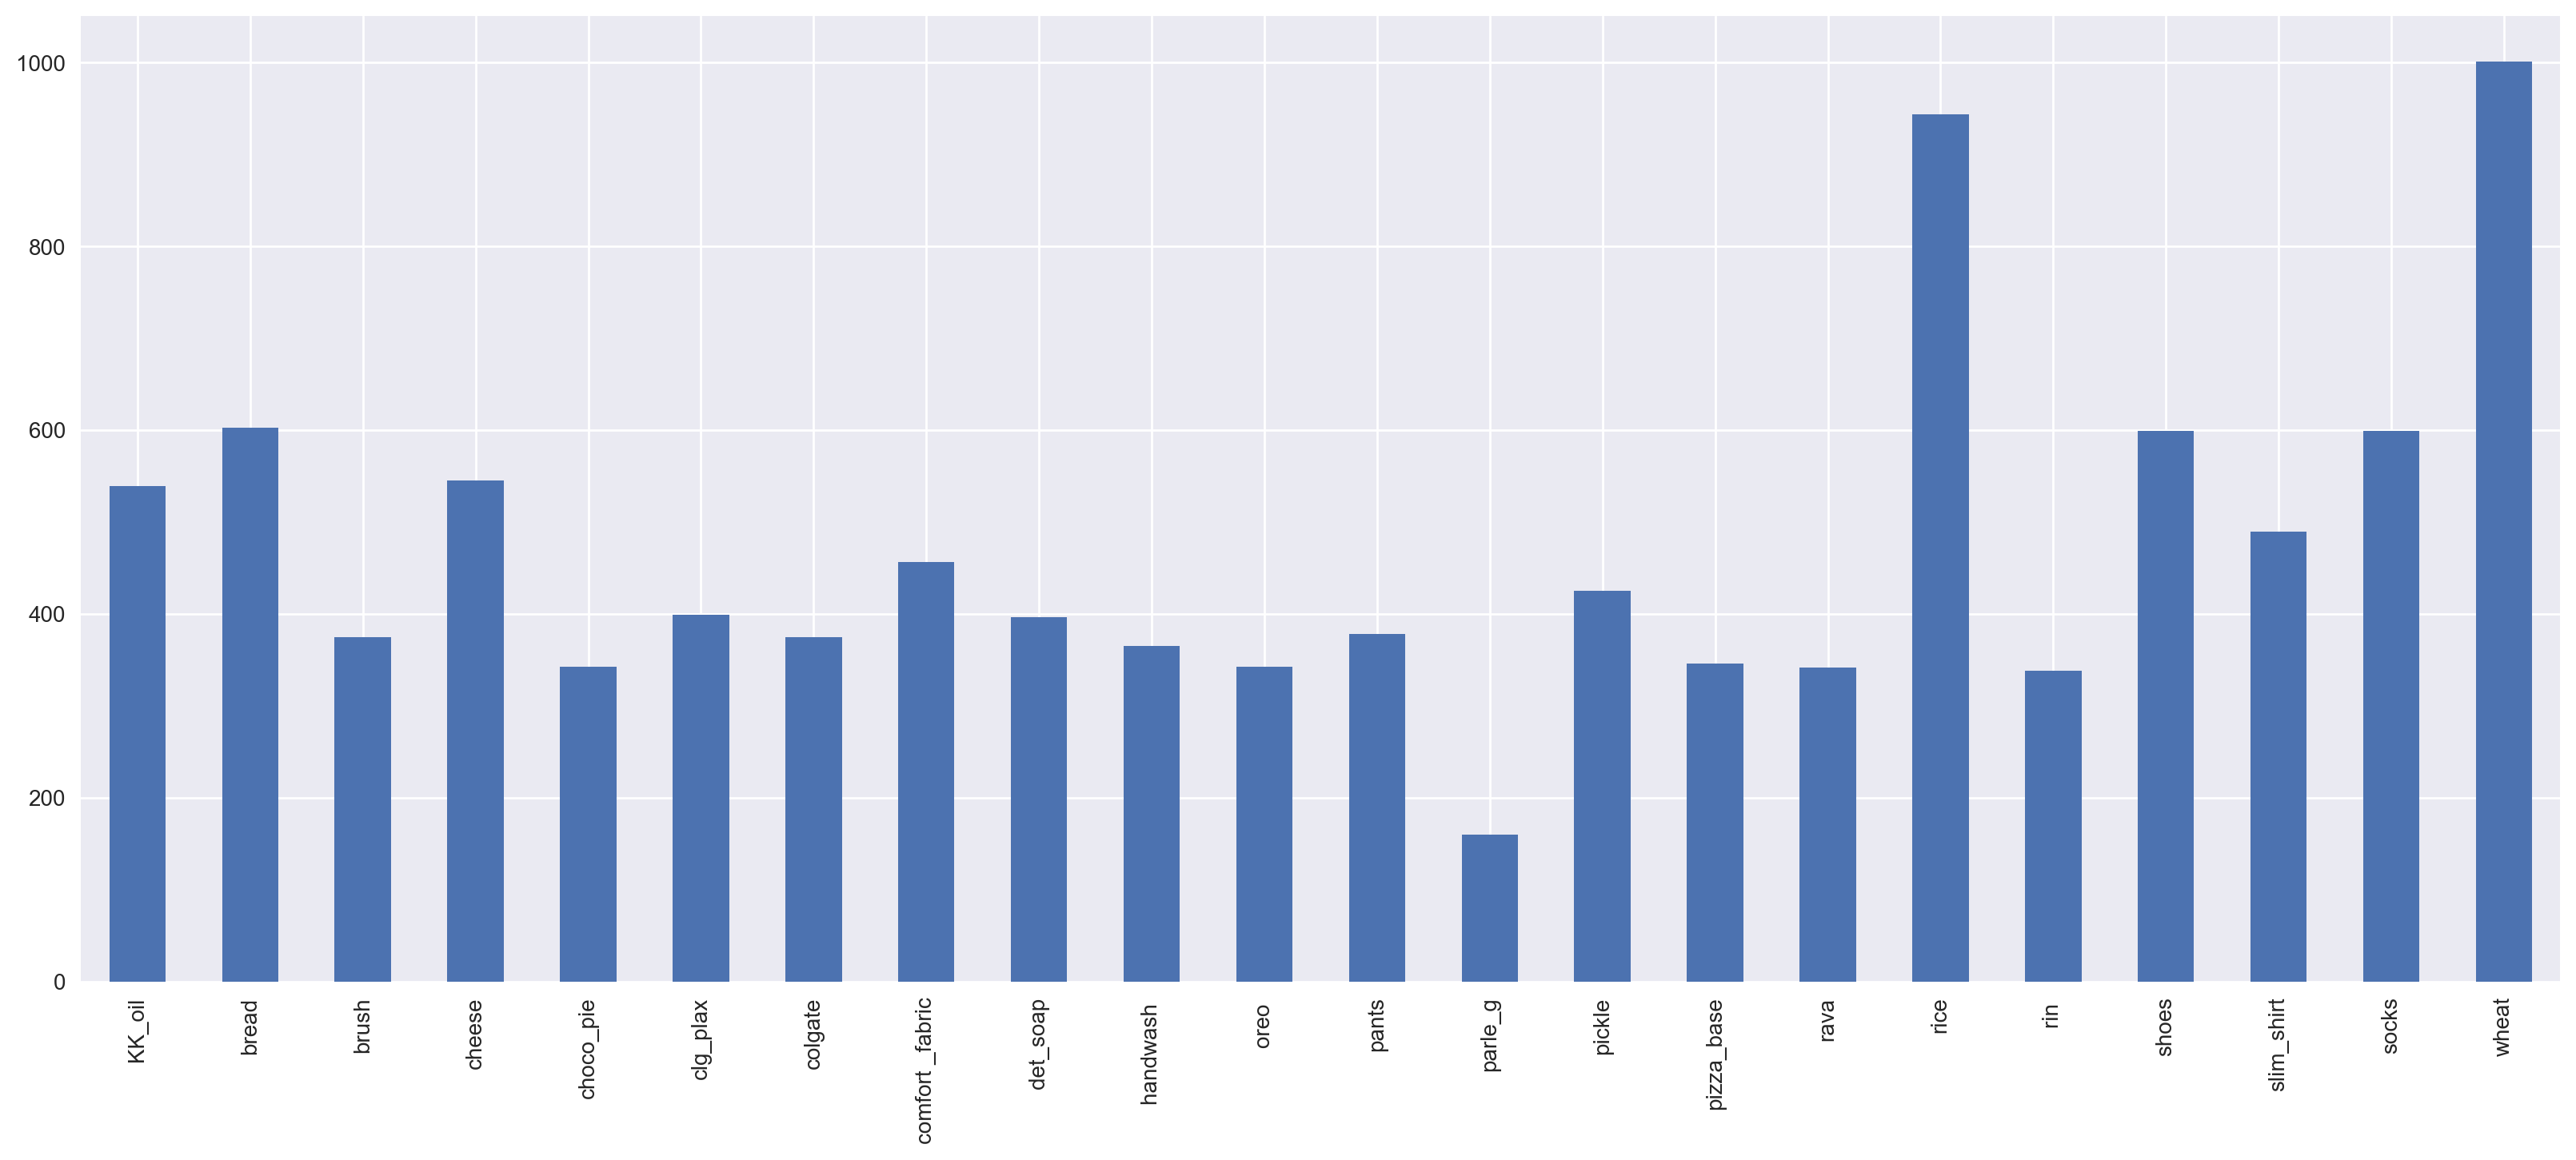

In [79]:
final_one_itemset.plot.bar()
plt.show()